# Project Name: House Prices (EDA, Feature Selection, Feature Engineering, Scaling)

The aim of this project is to analyse the various features in the dataset

The dataset is downloaded from the link given below:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


## Exploratory Data Analysis

#### Importing libraries

In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [239]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape)
train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [240]:
print(test.shape)
test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [241]:
df = train
df1 = test

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From the above data we can observe that:
1. Both numerical and categorical features are present 
2. There are a lot of features with null values
3. We can drop the features having more than 80% null values

In [243]:
print('Length of numerical features:', len(df.select_dtypes(include = np.number).columns))
print(df.select_dtypes(include = np.number).columns)
print(df.select_dtypes(include = object).columns)
print('Length of categorical features:', len(df.select_dtypes(include = object).columns))


Length of numerical features: 38
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'B

Here it is shown that 'MSSubClass' is a numerical feature but it is given in the description that is a categorical feature. So, we will change it to categorical feature.

In [244]:
df['MSSubClass'] = df['MSSubClass'].astype(str)

#### Checking for duplicates

In [245]:
df.duplicated().sum(), df1.duplicated().sum()

(0, 0)

#### Analysing the Missing values

Getting the percentage missing values for each feature

In [246]:
# the null values from train dataset
df_na = df.isnull().sum()/len(df) *100
df_na[df_na!=0].sort_values()

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

In [247]:
# the null values from test dataset
df1_na = df1.isnull().sum()/len(df1) *100
df1_na[df1_na!=0].sort_values()

TotalBsmtSF      0.068540
GarageArea       0.068540
GarageCars       0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
SaleType         0.068540
Exterior1st      0.068540
Exterior2nd      0.068540
Functional       0.137080
Utilities        0.137080
BsmtHalfBath     0.137080
BsmtFullBath     0.137080
MSZoning         0.274160
MasVnrArea       1.028101
MasVnrType       1.096642
BsmtFinType2     2.878684
BsmtFinType1     2.878684
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtCond         3.084304
GarageType       5.209047
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
GarageYrBlt      5.346127
LotFrontage     15.558602
FireplaceQu     50.034270
Fence           80.123372
Alley           92.666210
MiscFeature     96.504455
PoolQC          99.794380
dtype: float64

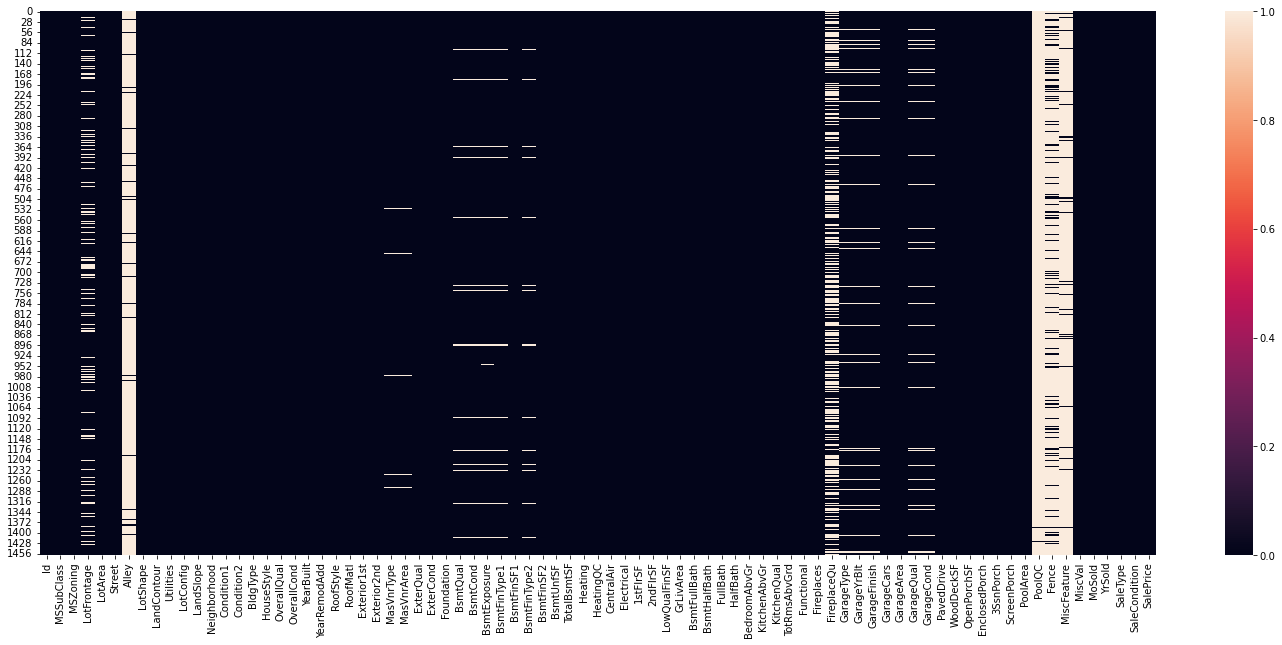

In [248]:
plt.figure(figsize = (25,10))
sns.heatmap(df.isnull())
plt.show()

From the above analysis we can observe that:
1. According to the description, most of the null values are shown because many values are not present in the features.
2. There are 4 features 'Fence' ,'Alley' ,'MiscFeature' ,'PoolQC', which have more than 80% of null values
3. We will handle these features by dropping them in the Feature Engineering part. 

#### Categorical Variables

In [249]:
cat = df.select_dtypes(include = object)
cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Relationship between all the categorical variables and target variable

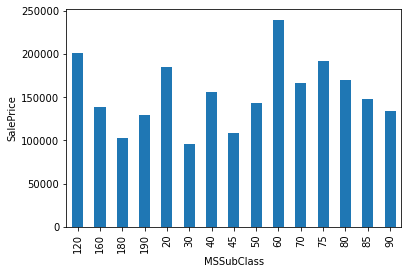

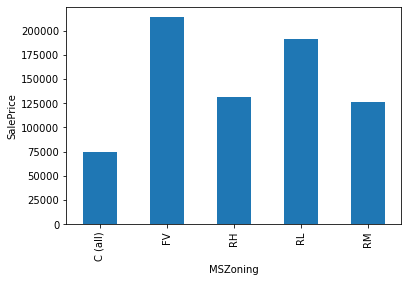

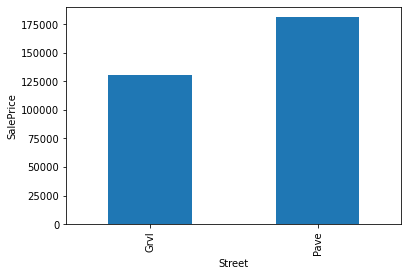

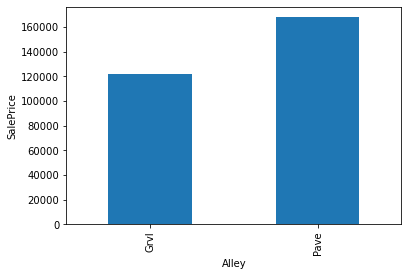

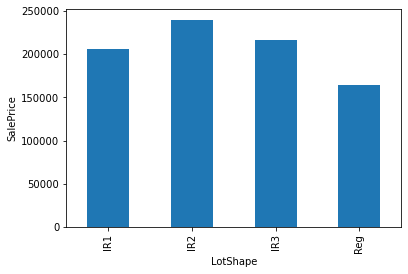

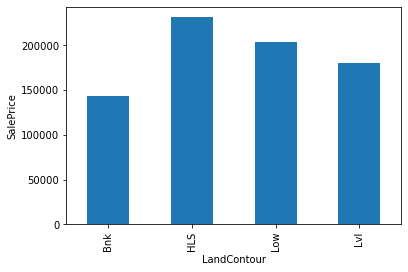

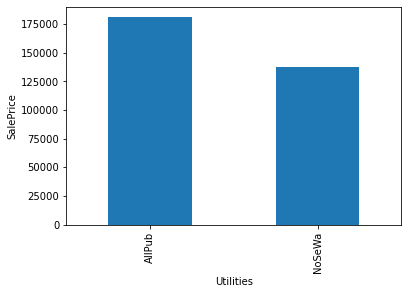

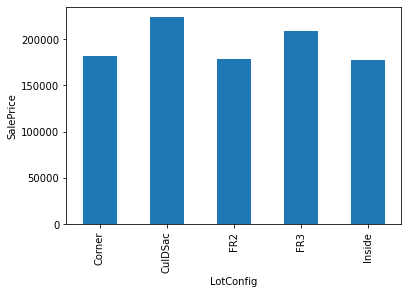

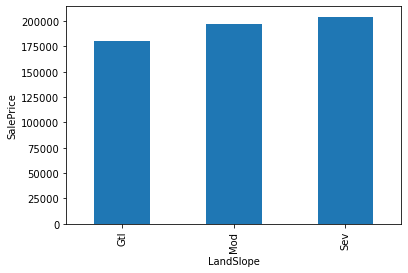

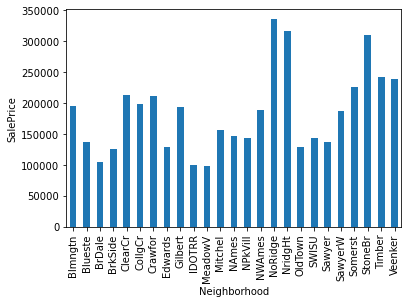

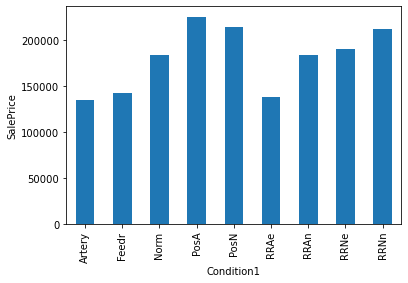

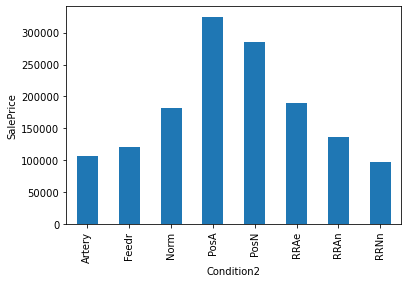

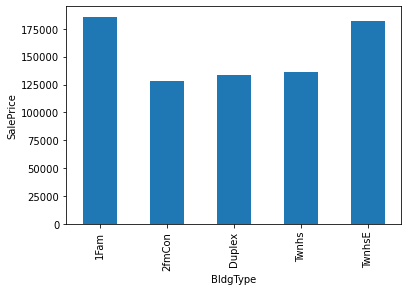

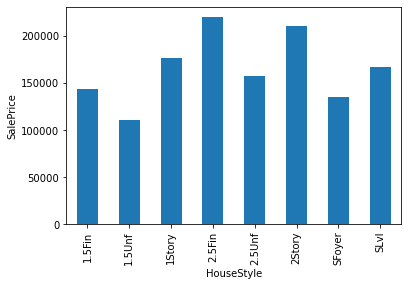

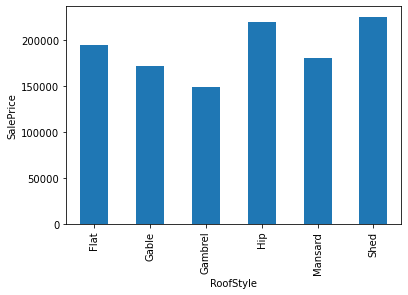

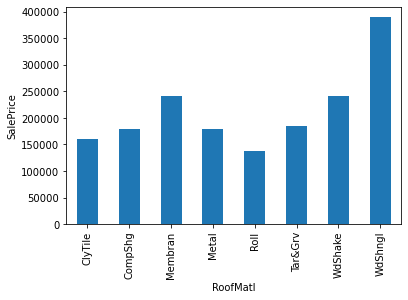

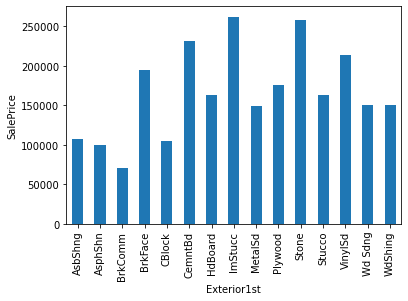

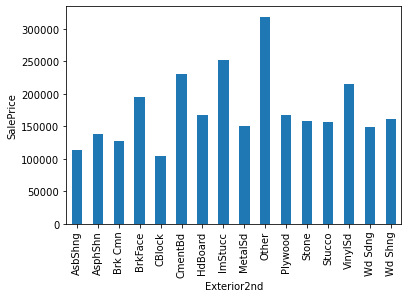

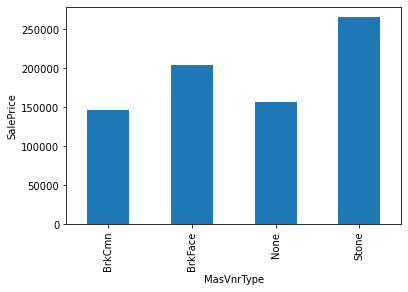

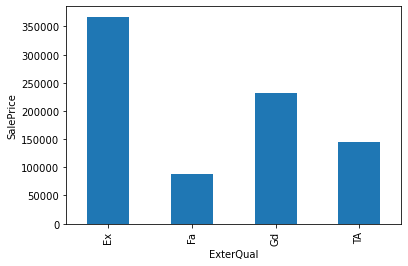

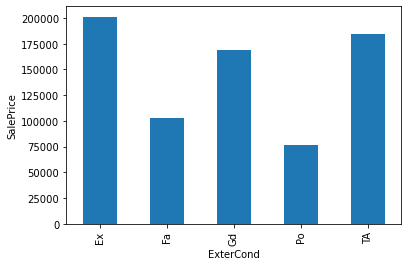

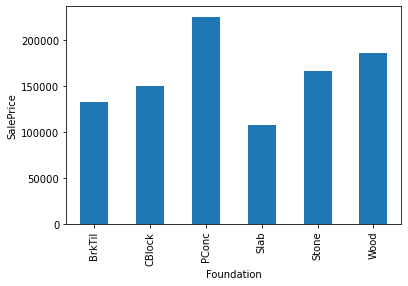

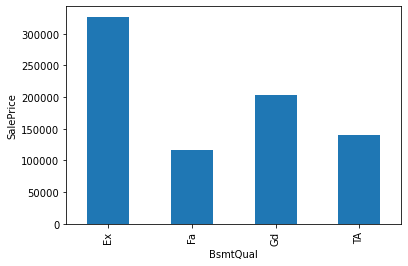

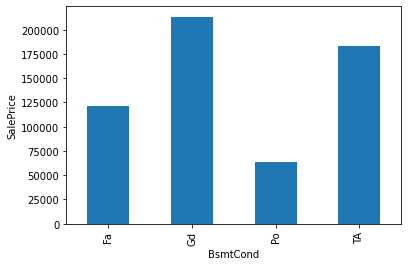

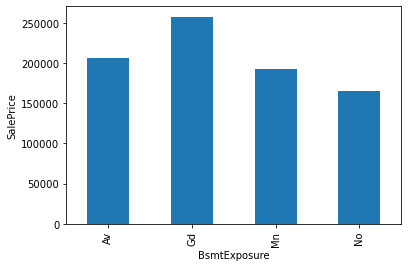

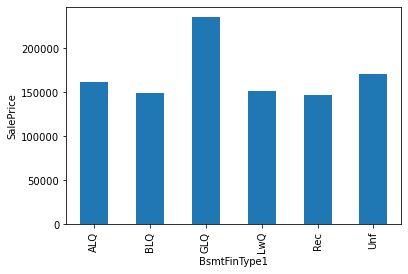

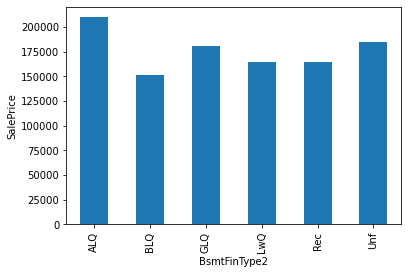

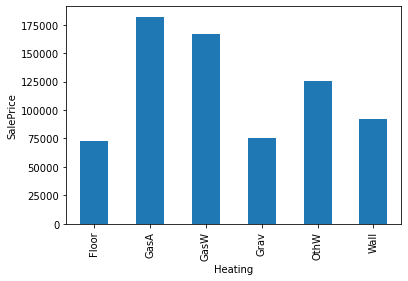

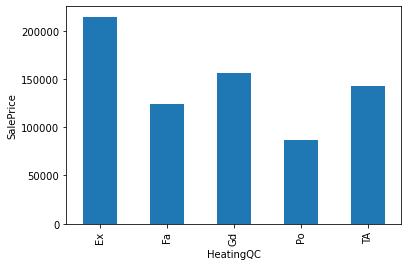

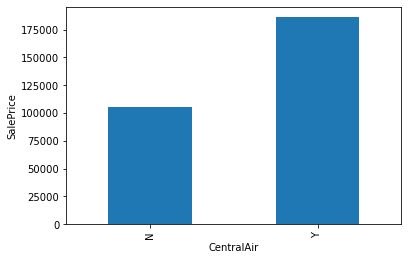

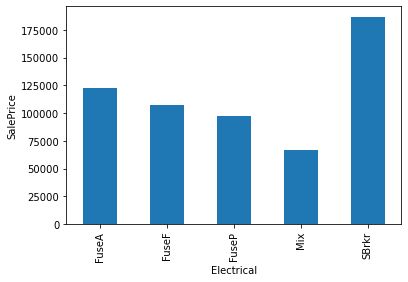

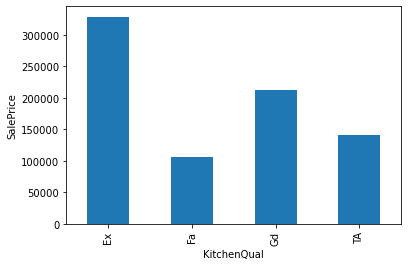

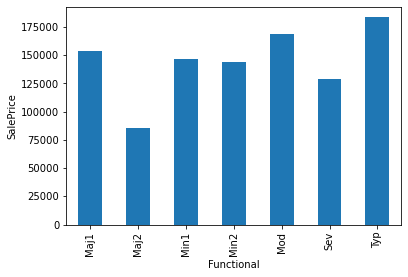

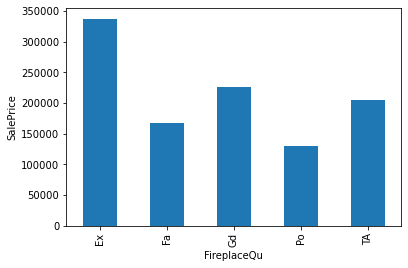

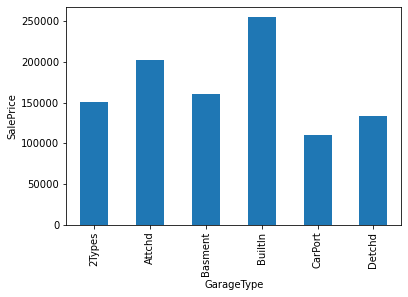

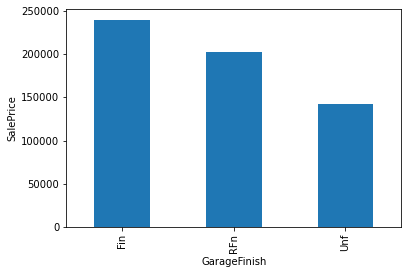

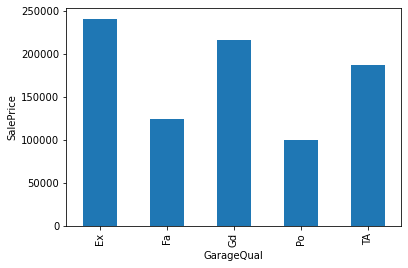

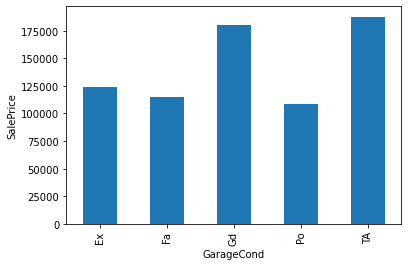

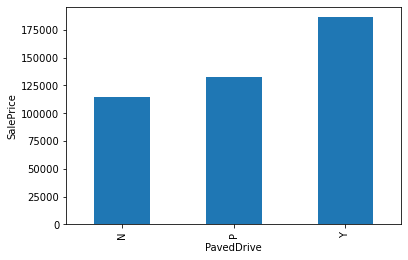

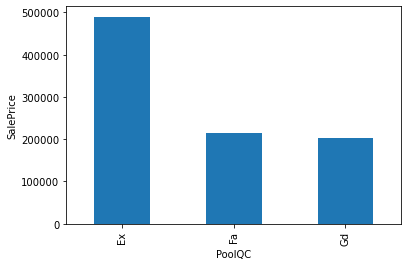

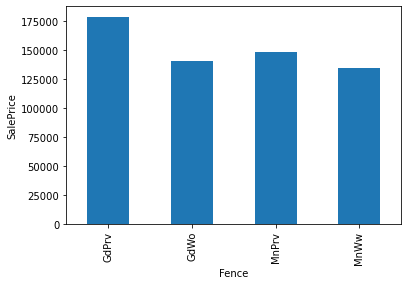

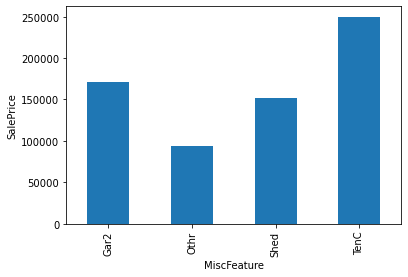

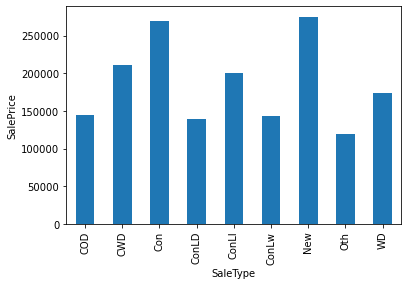

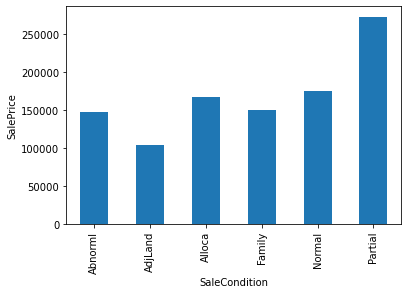

In [250]:
for var in cat:
    df.groupby(var)['SalePrice'].mean().plot.bar()
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()


### Numerical Variables

In [251]:
num = df.select_dtypes(include=np.number)
num.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


There are two types of numerical varibale:
1. Discrete
2. Continuous

We will analyse these two types separately

In [252]:
# Getting all the discrete varibales
discrete = [var for var in num if len(df[var].unique())<25 and var not in ['Id']]
print(len(discrete))
df[discrete].head()

17


,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008


Relationship between the Discrete variables and the Target variable

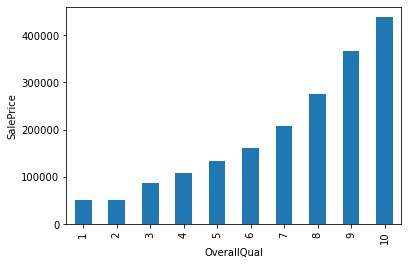

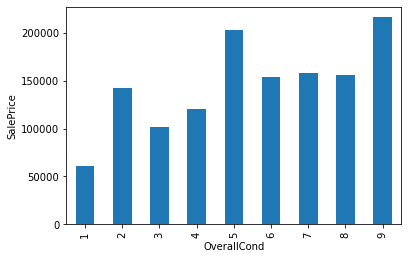

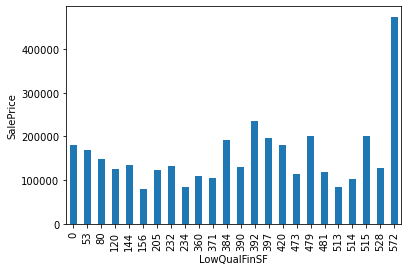

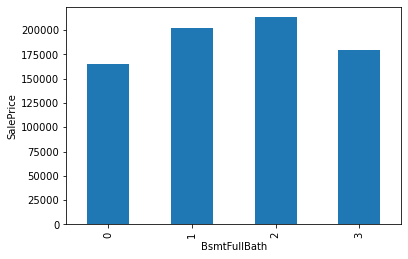

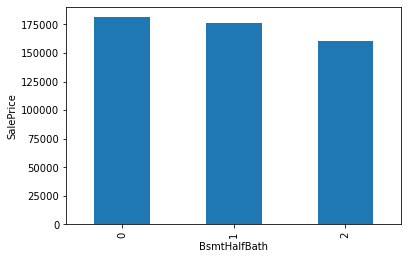

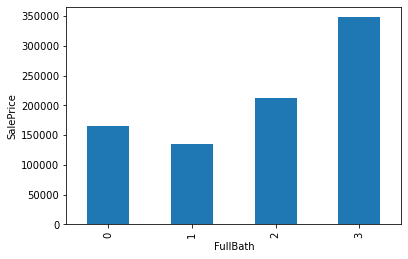

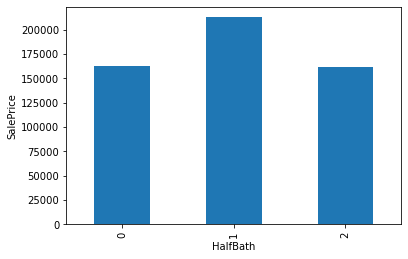

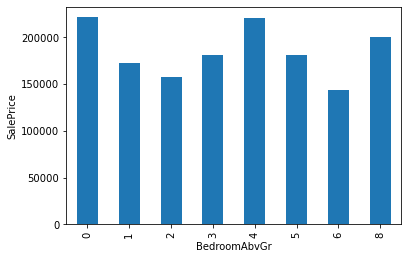

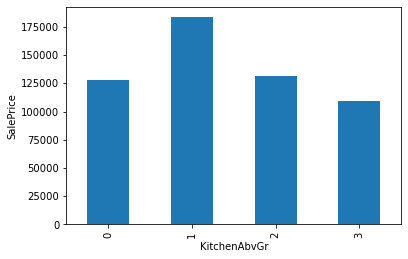

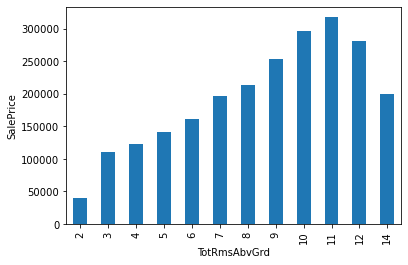

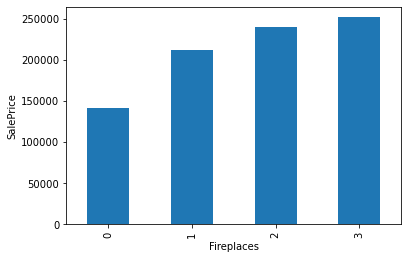

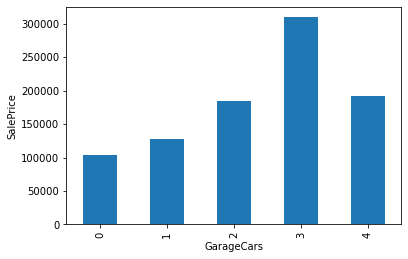

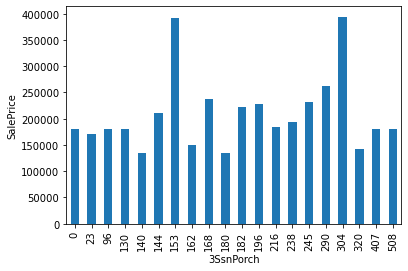

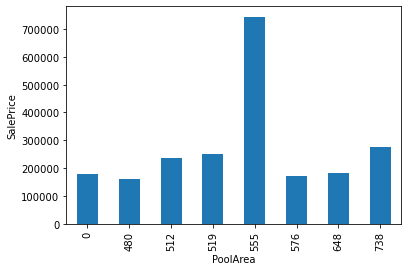

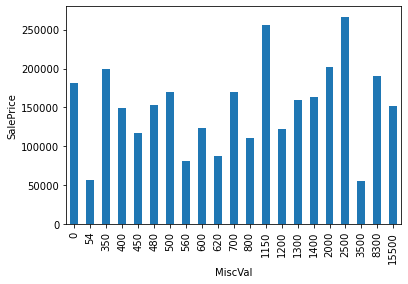

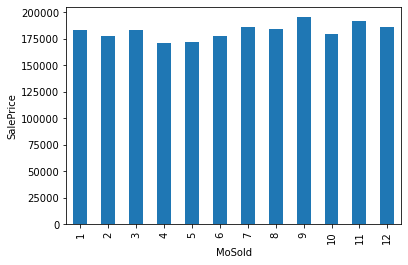

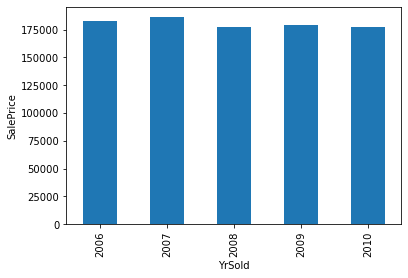

In [253]:
for var in discrete:
    df.groupby(var)['SalePrice'].mean().plot.bar()
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()

In [254]:
# Getting all the continuous varibales
continuous = [var for var in num if var not in discrete+['Id']]
print(len(continuous))
df[continuous].head()

19


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,2003.0,548,0,61,0,0,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,1976.0,460,298,0,0,0,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,1786,2001.0,608,0,42,0,0,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,1717,1998.0,642,0,35,272,0,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,2198,2000.0,836,192,84,0,0,250000


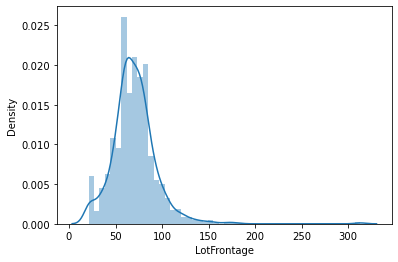

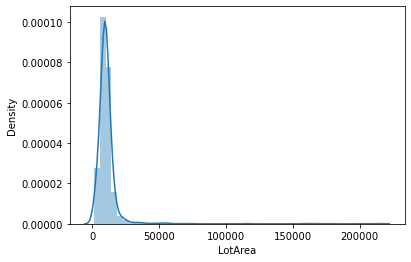

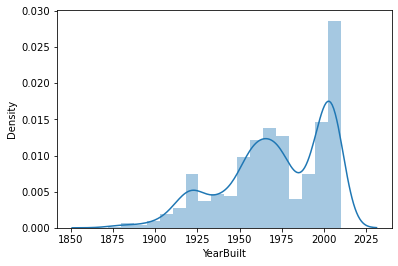

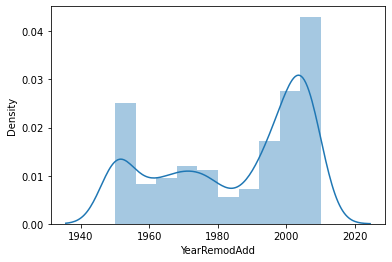

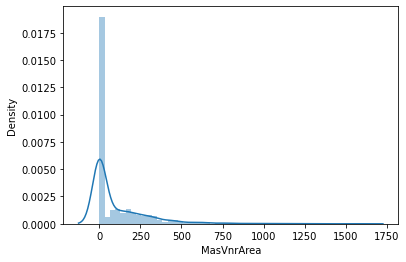

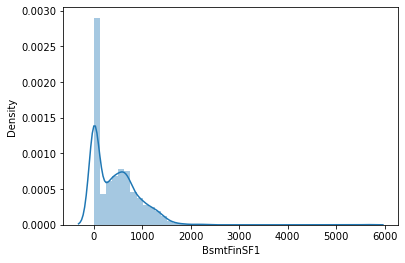

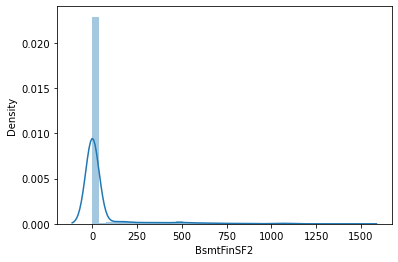

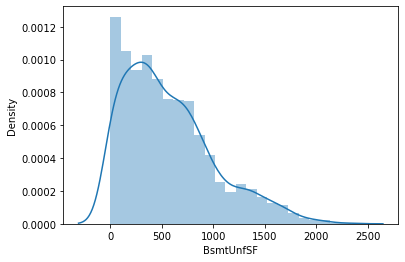

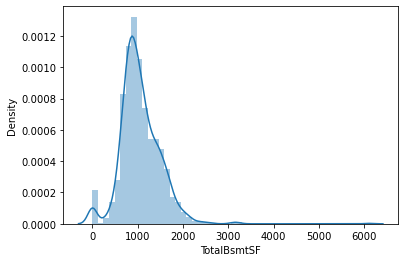

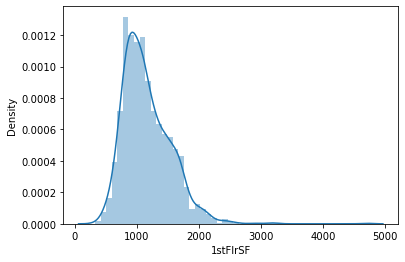

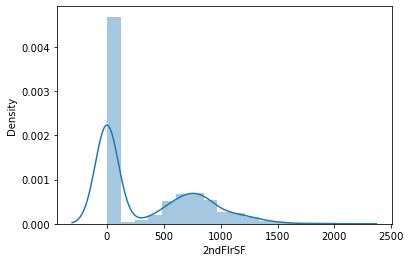

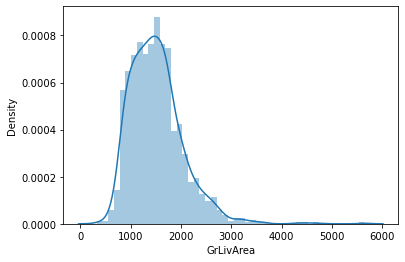

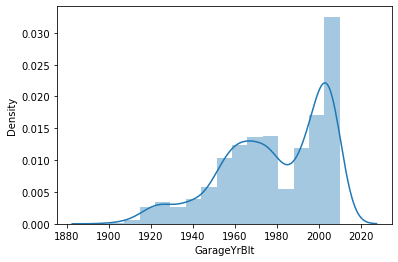

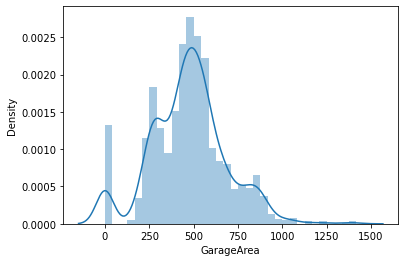

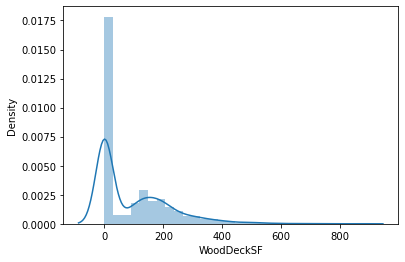

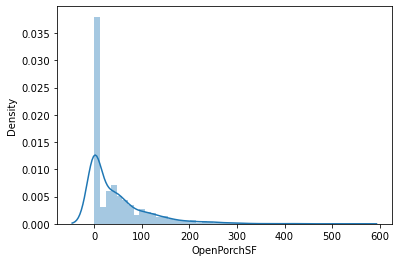

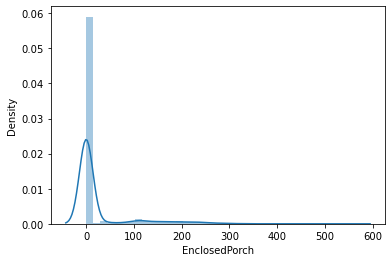

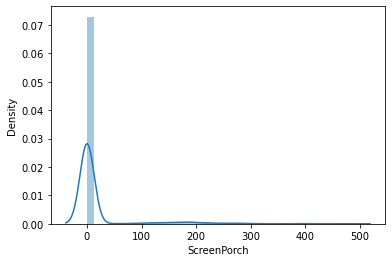

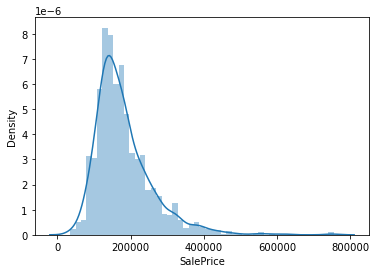

In [255]:
for var in continuous:
    sns.distplot(df[var])
    plt.show()

Most of these variables are highly skewed. We can transform them using log transformation in the feature transformation part

Relationship between the Continuous variables and the Target variable

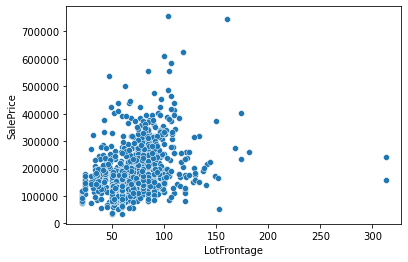

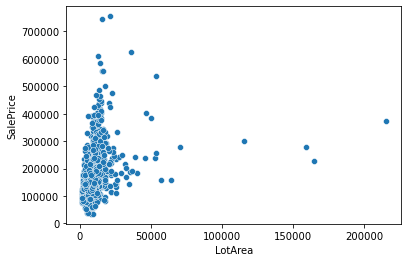

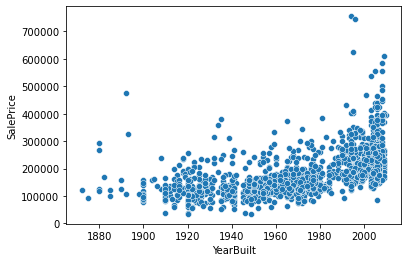

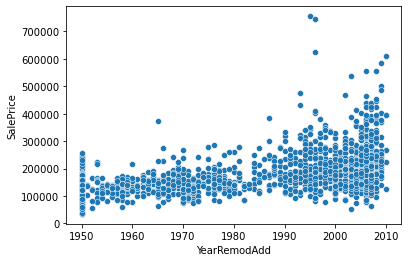

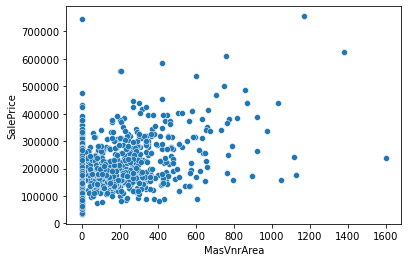

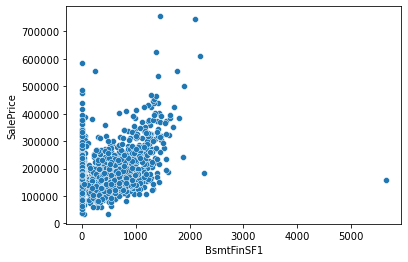

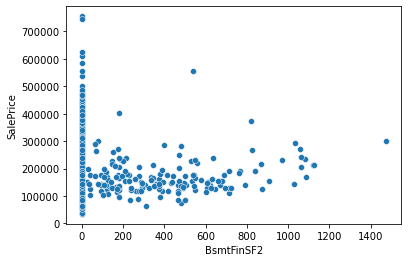

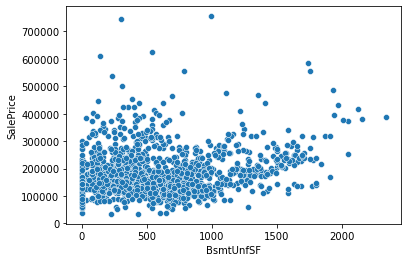

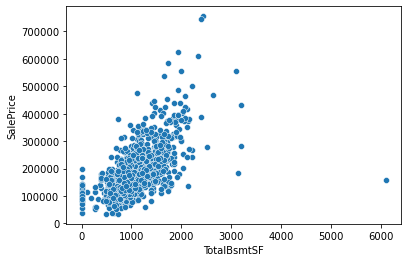

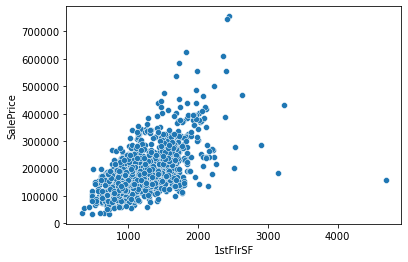

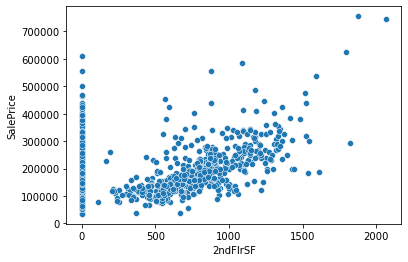

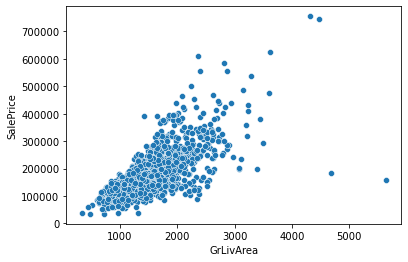

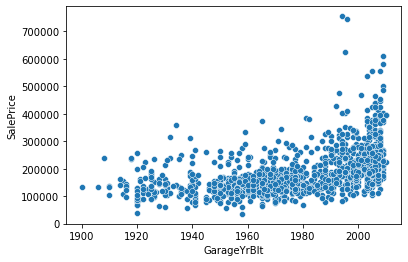

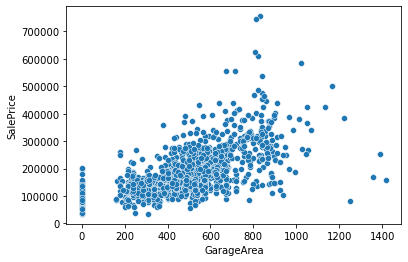

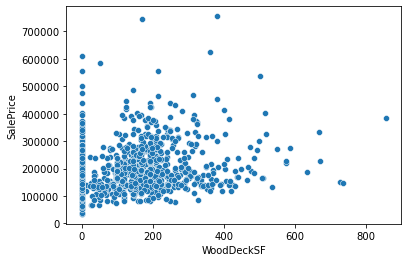

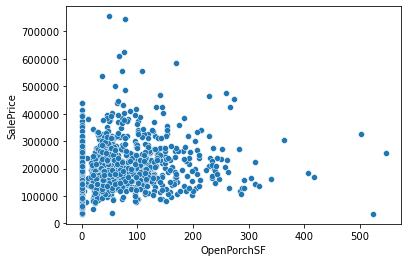

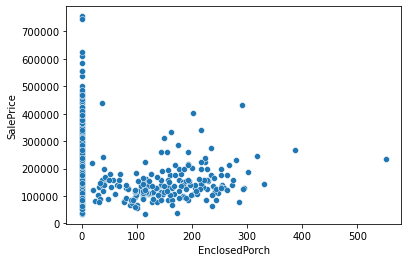

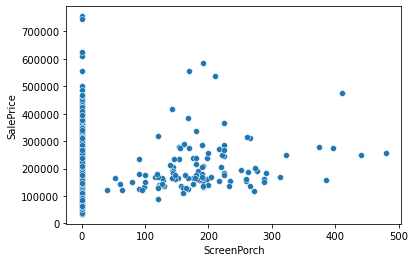

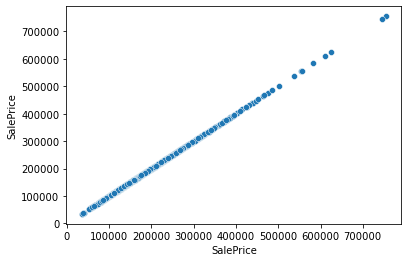

In [256]:
for var in continuous:
    sns.scatterplot(data=df,x=var,y='SalePrice')
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()

#### Checking outliers

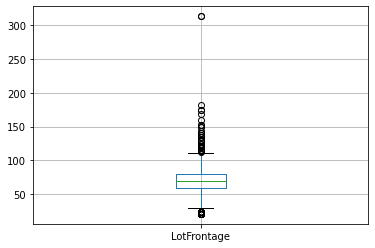

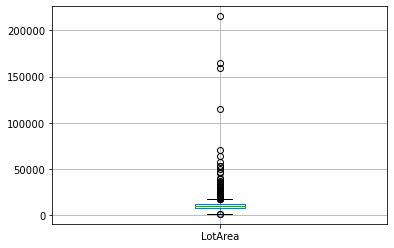

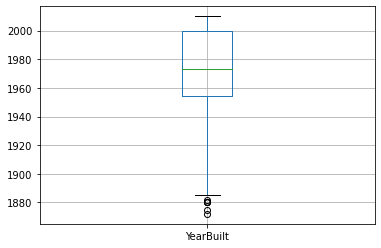

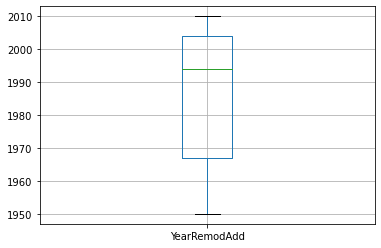

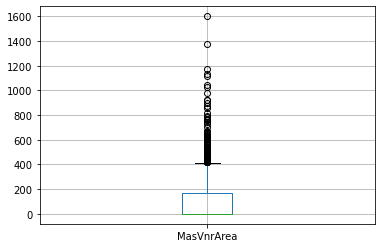

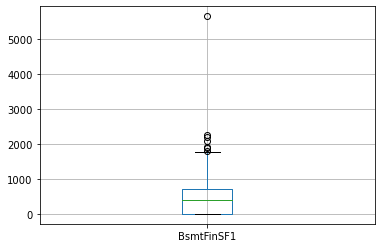

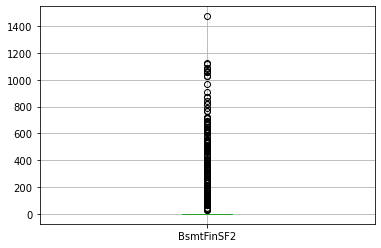

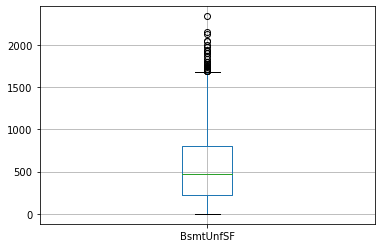

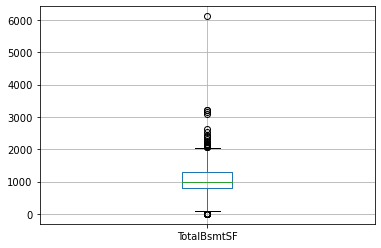

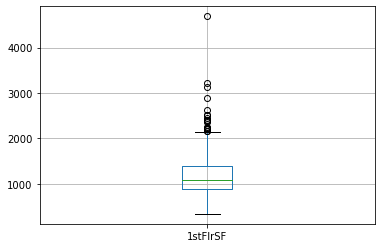

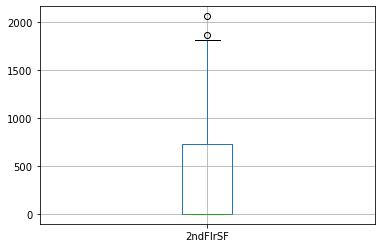

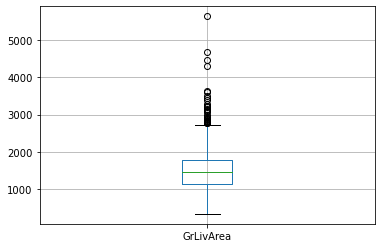

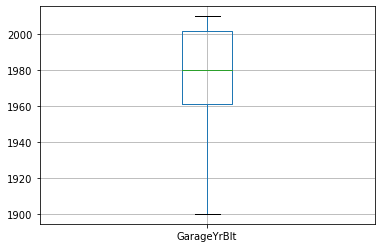

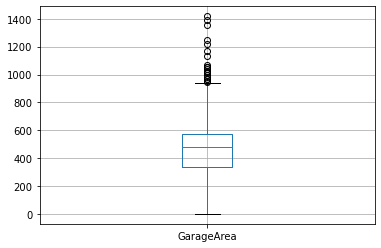

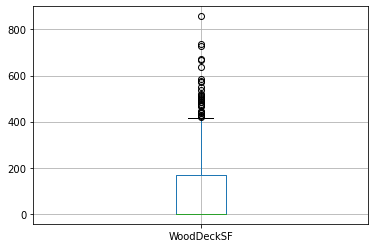

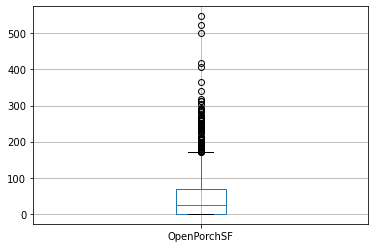

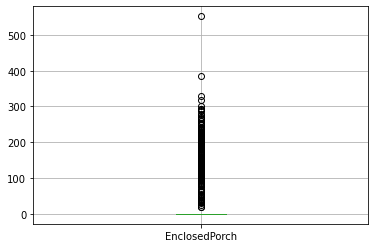

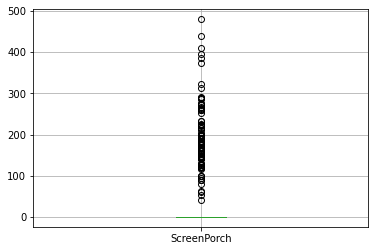

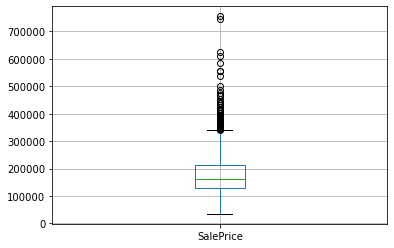

In [257]:
for var in continuous:
    df.boxplot(column = var)
    plt.show()

## Feature Selection

In this section we will check the correlation of the independent varibales with the dependent variables.
If independent features are highly correlated among independent variables by 80% or 90% then drop those kinds of features and train the model with the remaining features.

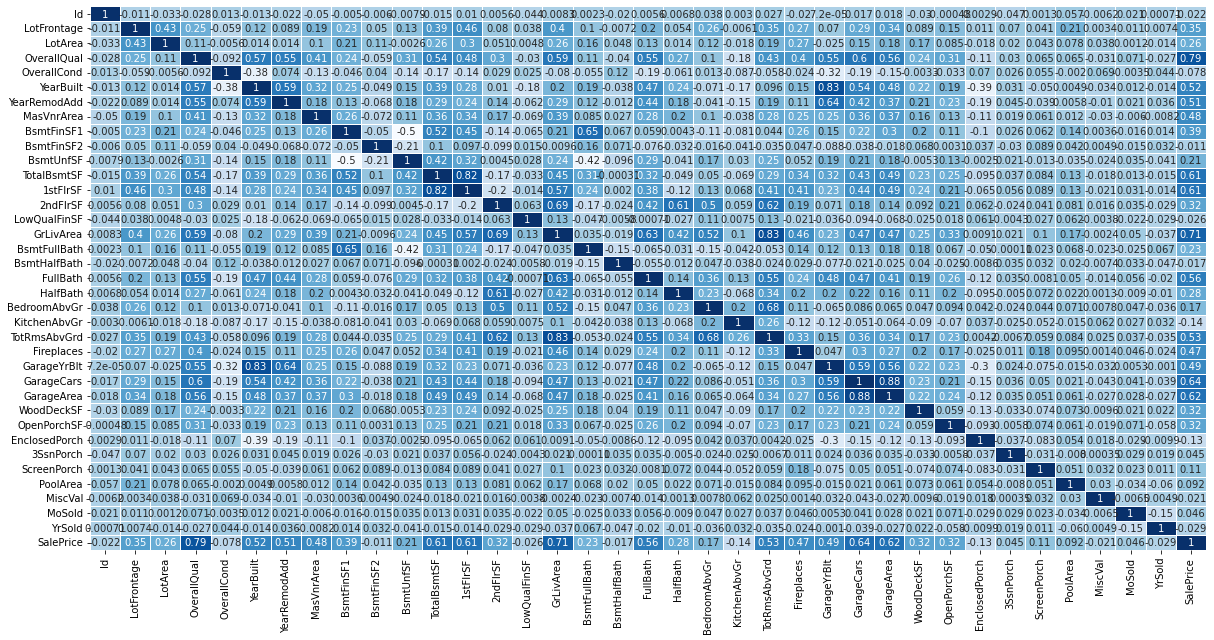

In [258]:
# using Pearson Correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=1,cmap=plt.cm.Blues,annot=True, cbar=False)
plt.show()

In [262]:
def cor(dataset, value):
    col_corr = set()
    corr_matrix  = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>value:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [265]:
df_corr_values = cor(df,0.8)
len(set(df_corr_values))

4

In [266]:
df_corr_values

{'1stFlrSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'}

In [268]:
df1_corr_values = cor(df1,0.8)
len(set(df1_corr_values))

2

In [269]:
df1_corr_values

{'GarageArea', 'GarageYrBlt'}

In [275]:
df = df.drop(df_corr_values,axis=1)

In [276]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [277]:
df1 = df1.drop(df1_corr_values,axis=1)

In [278]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Feature Engineering

#### Data Cleaning

 Handling the missing values

In [279]:
df_null = df.isnull().sum()/len(df) *100
df_null[df_null!=0].sort_values()

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtFinType2     2.602740
BsmtExposure     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

In [280]:
# Dropping the columns having more than 80% null values
df = df.drop(df.columns[df_null>80],1)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [281]:
# For test dataset
df1_null = df1.isnull().sum()/len(df1) *100
df1_null[df1_null!=0].sort_values()

BsmtUnfSF        0.068540
GarageCars       0.068540
KitchenQual      0.068540
TotalBsmtSF      0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
SaleType         0.068540
Exterior1st      0.068540
Exterior2nd      0.068540
BsmtHalfBath     0.137080
Functional       0.137080
BsmtFullBath     0.137080
Utilities        0.137080
MSZoning         0.274160
MasVnrArea       1.028101
MasVnrType       1.096642
BsmtFinType2     2.878684
BsmtFinType1     2.878684
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtCond         3.084304
GarageType       5.209047
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
LotFrontage     15.558602
FireplaceQu     50.034270
Fence           80.123372
Alley           92.666210
MiscFeature     96.504455
PoolQC          99.794380
dtype: float64

In [282]:
df1 = df1.drop(df1.columns[df1_null>80],1)
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


Handling the categorical null values

In [283]:
categorical = df.select_dtypes(include = object)
cat_na = categorical.isnull().sum()/len(categorical) * 100
cat_na[cat_na!=0].sort_values()

Electrical       0.068493
MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
FireplaceQu     47.260274
dtype: float64

* According to the description, most of the null values are shown because many values are not present in the features.
* We will handle them in two ways:
*1.  Replacing them with a constant value (None)
*2. Replacing them with the column mode value

In [284]:
# Impute using a constant value
for column in [
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
]:
    df[column] = df[column].fillna("None")
    
# Impute using the column mode
for column in [
    'MasVnrType',
    'Electrical',
]:
    df[column] = df[column].fillna(df[column].mode()[0])

In [285]:
categorical = df.select_dtypes(include = object)
cat_na = categorical.isnull().sum()/len(categorical) * 100
cat_na[cat_na!=0].sum()

0.0

In [286]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [287]:
# For test dataset
categorical1 = df1.select_dtypes(include = object)
cat_na1 = categorical1.isnull().sum()/len(categorical1) * 100
cat_na1[cat_na1!=0].sort_values()

SaleType         0.068540
Exterior1st      0.068540
Exterior2nd      0.068540
KitchenQual      0.068540
Utilities        0.137080
Functional       0.137080
MSZoning         0.274160
MasVnrType       1.096642
BsmtFinType2     2.878684
BsmtFinType1     2.878684
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtCond         3.084304
GarageType       5.209047
GarageCond       5.346127
GarageFinish     5.346127
GarageQual       5.346127
FireplaceQu     50.034270
dtype: float64

In [288]:
# Impute using a constant value
for column in [
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond'
]:
    df1[column] = df1[column].fillna("None")
    
# Impute using the column mode
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    df1[column] = df1[column].fillna(df1[column].mode()[0])

Handling the Numerical null values

For numerical null values first we will check the skewness. If the variable is hihgly skewed then we wil replace the null values with median otherwise with mean.

In [289]:
numerical_na=[var for var in df.columns if df[var].isnull().sum()>0 and df[var].dtypes!='O']
for var in numerical_na:
    print(var,np.round((df[var].isnull().mean())*100,4))


LotFrontage 17.7397
MasVnrArea 0.5479


In [290]:
for var in numerical_na:
    print(var,df[var].skew())

LotFrontage 2.163569142324884
MasVnrArea 2.669084210182863


In [291]:
# Since the varibles are highly skewd we will be replacing the numerical missing values with median
for var in numerical_na:
    df[var] = df[var].fillna(df[var].median())
    
df[numerical_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

In [292]:
# for test dataset
num_na1=[var for var in df1.columns if df1[var].isnull().sum()>0 and df1[var].dtypes!='O']
for var in num_na1:
    print(var,np.round((df1[var].isnull().mean())*100,4))

LotFrontage 15.5586
MasVnrArea 1.0281
BsmtFinSF1 0.0685
BsmtFinSF2 0.0685
BsmtUnfSF 0.0685
TotalBsmtSF 0.0685
BsmtFullBath 0.1371
BsmtHalfBath 0.1371
GarageCars 0.0685


In [293]:
for var in num_na1:
    sk = abs(df1[var].skew())
    if sk>0.5:
        df1[var] = df1[var].fillna(df1[var].median())
    else:
        df1[var] = df1[var].fillna(df1[var].mean())

df1[num_na1].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageCars      0
dtype: int64

## Feature Transformation

Numerical Variables

In [294]:
df0 = df.copy()

In [295]:
# Numerical varibles with skewness > 0.5 
for var in df0.select_dtypes(include = np.number):
    if abs(df0[var].skew()) > 0.5:
        print(var, abs(df0[var].skew()))


LotFrontage 2.4091466665496006
LotArea 12.207687851233496
OverallCond 0.6930674724842182
YearBuilt 0.613461172488183
YearRemodAdd 0.5035620027004709
MasVnrArea 2.6776164510820997
BsmtFinSF1 1.685503071910789
BsmtFinSF2 4.255261108933303
BsmtUnfSF 0.9202684528039037
TotalBsmtSF 1.5242545490627664
2ndFlrSF 0.8130298163023265
LowQualFinSF 9.011341288465387
GrLivArea 1.3665603560164552
BsmtFullBath 0.596066609663168
BsmtHalfBath 4.103402697955168
HalfBath 0.675897448233722
KitchenAbvGr 4.488396777072859
Fireplaces 0.6495651830548841
WoodDeckSF 1.5413757571931312
OpenPorchSF 2.3643417403694404
EnclosedPorch 3.08987190371177
3SsnPorch 10.304342032693112
ScreenPorch 4.122213743143115
PoolArea 14.828373640750588
MiscVal 24.476794188821916
SalePrice 1.8828757597682129


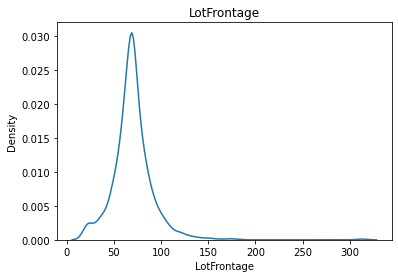

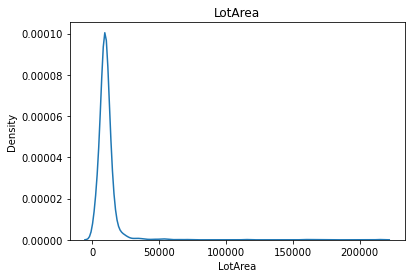

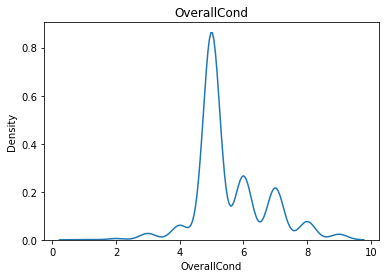

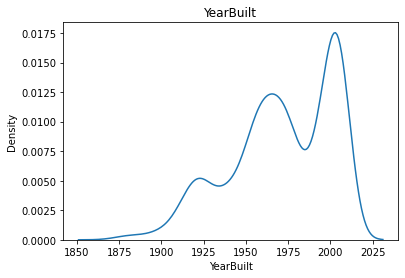

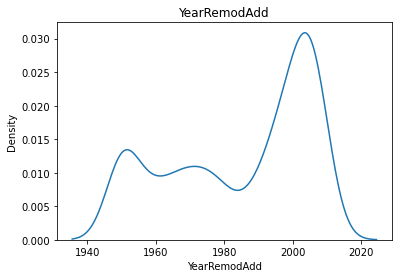

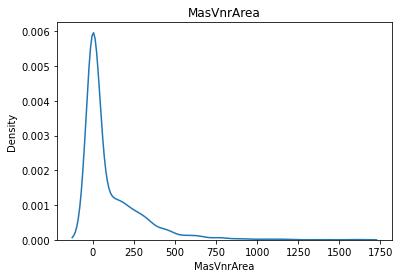

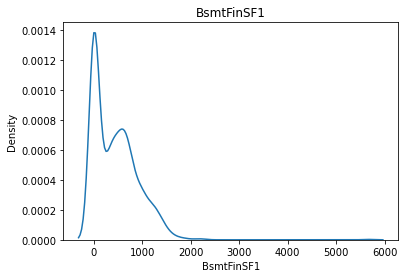

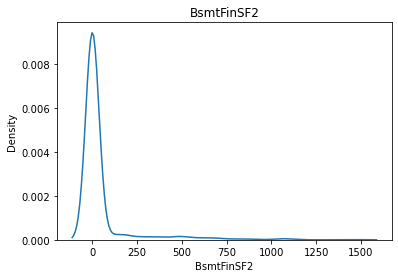

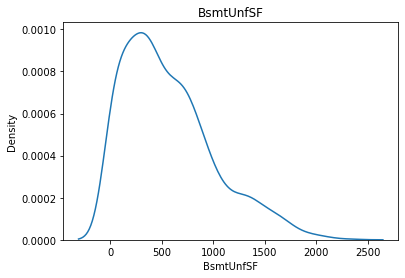

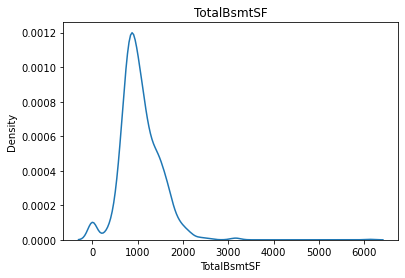

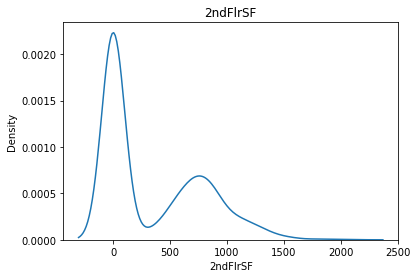

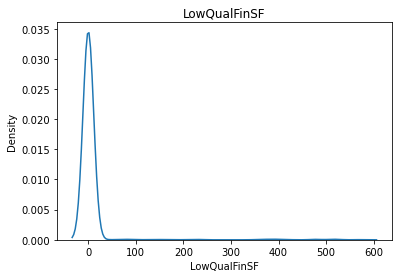

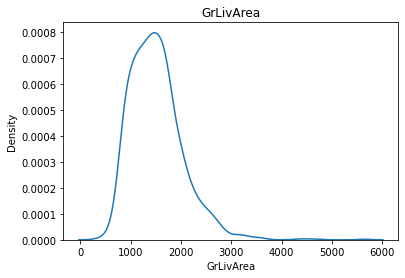

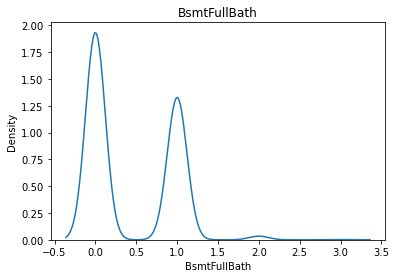

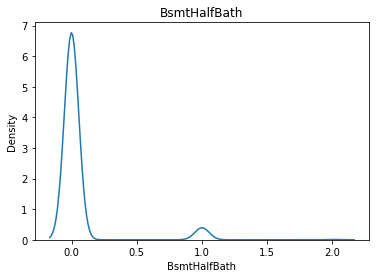

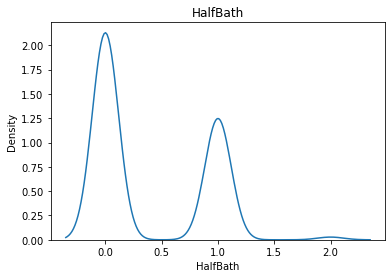

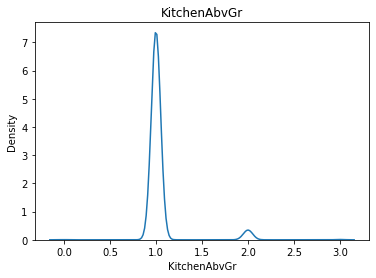

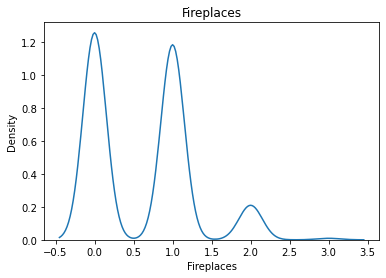

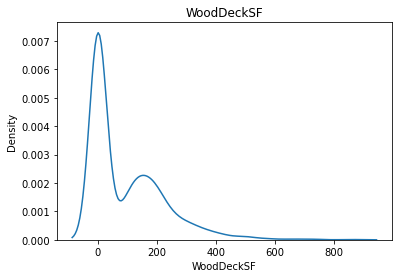

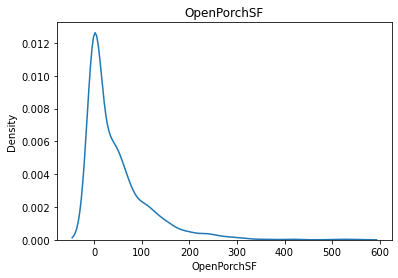

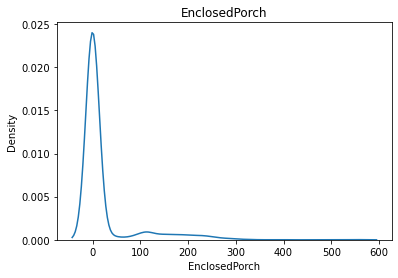

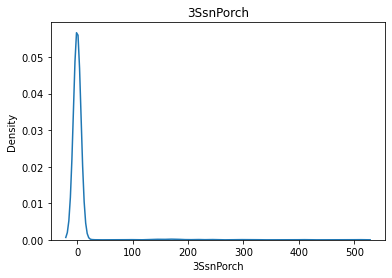

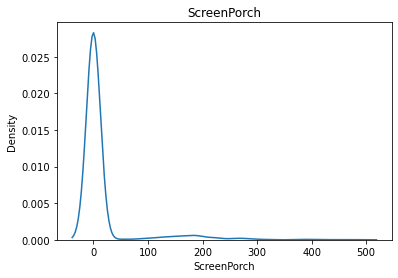

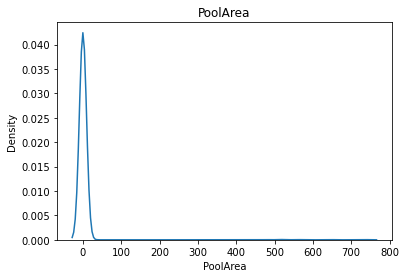

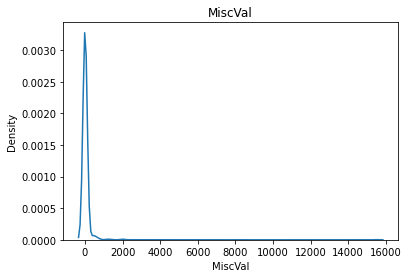

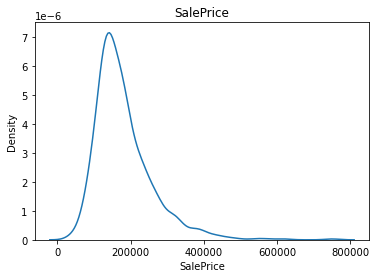

In [296]:
# plot before tranformation
for var in df0.select_dtypes(include = np.number):
    if abs(df0[var].skew()) > 0.5:
        sns.kdeplot(df0[var])
        plt.title(var)
        plt.show()
    

In [297]:
# Applying Log transformation 
for var in df0.select_dtypes(include = np.number):
    if abs(df0[var].skew()) > 0.5:
        df0[var] = np.log1p(df0[var])
        print(var, abs(df0[var].skew()))


LotFrontage 0.870005697584457
LotArea 0.13740448122837784
OverallCond 0.2540153892640734
YearBuilt 0.6411293652809006
YearRemodAdd 0.5110053231492848
MasVnrArea 0.5035317177020202
BsmtFinSF1 0.618409817855514
BsmtFinSF2 2.5236937641679753
BsmtUnfSF 2.1865035796982095
TotalBsmtSF 5.1546699835179135
2ndFlrSF 0.28964345806359637
LowQualFinSF 7.460316514621369
GrLivArea 0.006140253486287281
BsmtFullBath 0.4192126338281104
BsmtHalfBath 3.9330635244650436
HalfBath 0.566168222965837
KitchenAbvGr 3.8694137036546494
Fireplaces 0.18208270108947197
WoodDeckSF 0.15353659020909782
OpenPorchSF 0.02339729485739231
EnclosedPorch 2.1122749483873156
3SsnPorch 7.734974870241933
ScreenPorch 3.150408862444581
PoolArea 14.363102459725052
MiscVal 5.170703861673264
SalePrice 0.12134661989685333


In [298]:
# applying the same for test dataset
df1_1 = df1.copy()
for var in df1_1.select_dtypes(include = np.number):
    if abs(df1_1[var].skew()) > 0.5:
        df1_1[var] = np.log1p(df1_1[var])
        print(var, abs(df1_1[var].skew()))


MSSubClass 0.24174959293533216
LotFrontage 1.1032497312471825
LotArea 0.9155979096205403
YearBuilt 0.6128712404686251
MasVnrArea 0.5720665767657489
BsmtFinSF1 0.6192137607253373
BsmtFinSF2 2.4085684003924284
BsmtUnfSF 2.13691483412374
TotalBsmtSF 4.832563785979995
1stFlrSF 0.0534988253222509
2ndFlrSF 0.3210095920734259
LowQualFinSF 10.318601997446763
GrLivArea 0.02837627019976131
BsmtFullBath 0.4313575855548519
BsmtHalfBath 3.6375845255568144
HalfBath 0.5964915406799054
KitchenAbvGr 3.1501999978099353
TotRmsAbvGrd 0.13386286443687162
Fireplaces 0.29412900401924885
WoodDeckSF 0.16285099558096133
OpenPorchSF 0.06033691615088133
EnclosedPorch 1.8279296142900363
3SsnPorch 10.543858622404805
ScreenPorch 2.7717848105645366
PoolArea 15.720913674047146
MiscVal 5.262633390679069


Categorical variables

In [299]:
df0 = pd.get_dummies(df0)
df0

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,4.189655,9.042040,7,1.791759,7.602900,7.602900,5.283204,6.561031,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,2,4.394449,9.169623,6,2.197225,7.589336,7.589336,0.000000,6.886532,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,3,4.234107,9.328212,7,1.791759,7.601902,7.602401,5.093750,6.188264,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,4,4.110874,9.164401,7,1.791759,7.557995,7.586296,0.000000,5.379897,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,5,4.442651,9.565284,8,1.791759,7.601402,7.601402,5.860786,6.486161,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,4.143135,8.976894,6,1.791759,7.600902,7.601402,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1456,1457,4.454347,9.486152,6,1.945910,7.590347,7.595387,4.787492,6.673298,5.099866,...,0,0,0,1,0,0,0,0,1,0
1457,1458,4.204693,9.109746,7,2.302585,7.571474,7.604396,0.000000,5.620401,0.000000,...,0,0,0,1,0,0,0,0,1,0
1458,1459,4.234107,9.181735,5,1.945910,7.576097,7.599401,0.000000,3.912023,6.937314,...,0,0,0,1,0,0,0,0,1,0


In [300]:
#for test
df1_1 = pd.get_dummies(df1_1)
df1_1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,3.044522,4.394449,9.360741,5,6,7.581720,1961,0.000000,6.150603,...,0,0,0,1,0,0,0,0,1,0
1,1462,3.044522,4.406719,9.565775,6,6,7.580189,1958,4.691348,6.828712,...,0,0,0,1,0,0,0,0,1,0
2,1463,4.110874,4.317488,9.534668,5,5,7.599902,1998,0.000000,6.674561,...,0,0,0,1,0,0,0,0,1,0
3,1464,4.110874,4.369448,9.208238,6,6,7.600402,1998,3.044522,6.401917,...,0,0,0,1,0,0,0,0,1,0
4,1465,4.795791,3.784190,8.518392,8,5,7.597396,1992,0.000000,5.575949,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,5.081404,3.091042,7.568896,4,7,7.586296,1970,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1455,2916,5.081404,3.091042,7.546974,4,5,7.586296,1970,0.000000,5.533389,...,0,0,0,1,1,0,0,0,0,0
1456,2917,3.044522,5.081404,9.903538,5,7,7.581210,1996,0.000000,7.110696,...,0,0,0,1,1,0,0,0,0,0
1457,2918,4.454347,4.143135,9.253591,5,5,7.597396,1992,0.000000,5.823046,...,0,0,0,1,0,0,0,0,1,0


## Scaling

In [301]:
#For train set
df01 = df0.copy()

In [302]:
ss= StandardScaler()

In [303]:
ss.fit(df01)
df01 = pd.DataFrame(ss.transform(df01), index = df01.index, columns = df01.columns)
df01

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,-0.078896,-0.133270,0.651479,-0.460408,1.045180,0.877541,1.203619,0.779431,-0.355342,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-1.728492,0.572719,0.113413,-0.071836,1.948163,0.163445,-0.424186,-0.806841,0.888257,-0.355342,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-1.726120,0.062541,0.420049,0.651479,-0.460408,0.980275,0.829642,1.131524,0.654803,-0.355342,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-1.723747,-0.329561,0.103317,0.651479,-0.460408,-1.873790,-0.715872,-0.806841,0.384539,-0.355342,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,-1.721374,0.726089,0.878431,1.374795,-0.460408,0.947798,0.733773,1.423411,0.754400,-0.355342,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,-0.226913,-0.259231,-0.071836,-0.460408,0.915305,0.733773,-0.806841,-1.414140,-0.355342,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,1.723747,0.763303,0.725429,-0.071836,0.455288,0.229170,0.156540,1.014981,0.816966,2.409693,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,1.726120,-0.031048,-0.002359,0.651479,2.574033,-0.997641,1.021093,-0.806841,0.464947,-0.355342,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,1.728492,0.062541,0.136833,-0.795151,0.455288,-0.697090,0.541748,-0.806841,-0.106220,3.405917,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [304]:
#for test set
df1_2 = df1_1.copy()
ss.fit(df1_2)
df1_2 = pd.DataFrame(ss.transform(df1_2), index = df1_2.index, columns = df1_2.columns)
df1_2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730864,-1.116585,0.623823,0.561787,-0.751101,0.400766,-0.332514,-1.072885,-0.780195,0.648657,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
1,-1.728490,-1.116585,0.661410,0.970407,-0.054877,0.400766,-0.431392,-1.214908,1.015602,0.876989,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
2,-1.726115,0.414449,0.388069,0.908413,-0.751101,-0.497418,0.842369,0.678742,-0.780195,0.825084,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
3,-1.723741,0.414449,0.547237,0.257857,-0.054877,0.400766,0.874702,0.678742,0.385215,0.733280,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
4,-1.721367,1.397832,-1.245577,-1.116969,1.337571,-0.497418,0.680463,0.394694,-0.780195,0.455161,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.721367,1.807907,-3.368886,-3.009264,-1.447325,1.298950,-0.036784,-0.646813,-0.780195,-1.422364,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
1455,1.723741,1.807907,-3.368886,-3.052953,-1.447325,-0.497418,-0.036784,-0.646813,-0.780195,0.440830,...,-0.045392,-0.295268,-0.052432,0.398568,3.923424,-0.074253,-0.091066,-0.134699,-2.172917,-0.299365
1456,1.726115,-1.116585,2.728164,1.643551,-0.751101,1.298950,-0.365457,0.584059,-0.780195,0.971939,...,-0.045392,-0.295268,-0.052432,0.398568,3.923424,-0.074253,-0.091066,-0.134699,-2.172917,-0.299365
1457,1.728490,0.907598,-0.146025,0.348243,-0.751101,-0.497418,0.680463,0.394694,-0.780195,0.538363,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365


Target Transformation

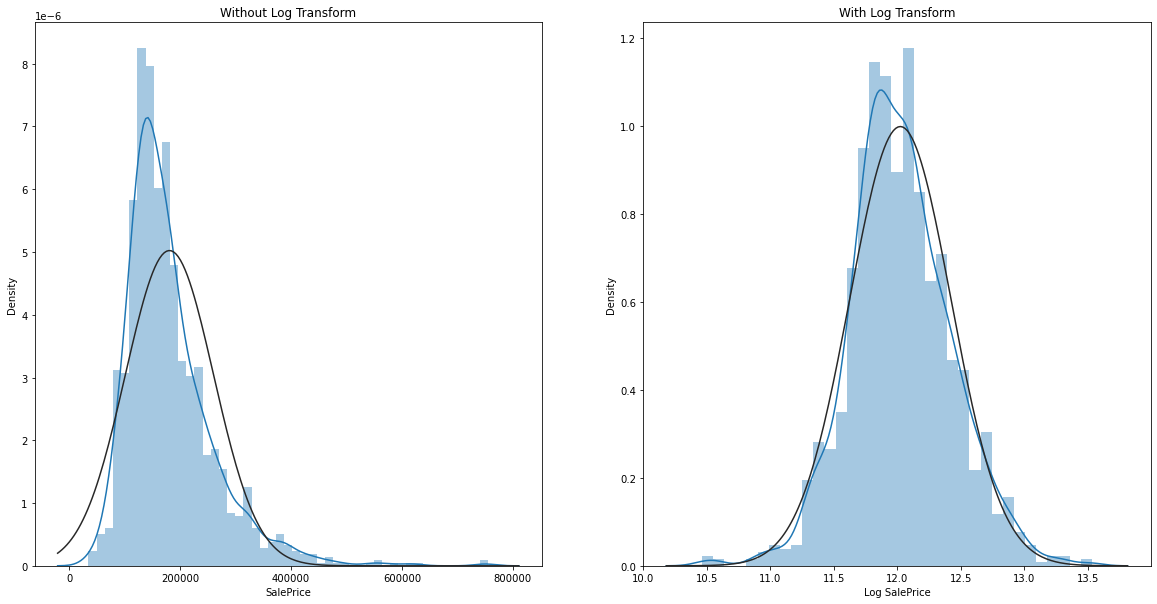

In [305]:

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(df['SalePrice'] , kde=True, fit=scipy.stats.norm)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(df['SalePrice']), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

plt.show()